In [1]:
# Objective: Analyze the performance of different marketing campaigns to determine which channels and
# audience segments yield the highest return on investment (ROI) and engagement.

In [2]:
# -- imports --
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# -- Load dataset --
df = pd.read_csv(r'../data/marketing_campaign_dataset.csv')
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [4]:
# -- checking shape + clenliness of data --
print("shape", df.shape)
print("\nMissin Values \n", df.isnull().sum())

shape (200000, 16)

Missin Values 
 Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64


In [5]:
# Exploratory Data Analysis
# General Stats
df.describe(include="all")

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
count,200000.000000,200000,200000,200000,200000,200000,200000.000000,200000,200000.000000,200000,200000,200000.000000,200000.000000,200000.000000,200000,200000
unique,NaN,5,5,5,4,6,NaN,15001,NaN,5,5,NaN,NaN,NaN,5,365
top,NaN,TechCorp,Influencer,Men 18-24,30 days,Email,NaN,"$16,578.00",NaN,Miami,Mandarin,NaN,NaN,NaN,Foodies,2021-11-09
freq,NaN,40237,40169,40258,50255,33599,NaN,32,NaN,40269,40255,NaN,NaN,NaN,40208,548
mean,100000.500000,NaN,NaN,NaN,NaN,NaN,0.080070,NaN,5.002438,NaN,NaN,549.772030,5507.301520,5.494710,NaN,NaN
std,57735.171256,NaN,NaN,NaN,NaN,NaN,0.040602,NaN,1.734488,NaN,NaN,260.019056,2596.864286,2.872581,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.010000,NaN,2.000000,NaN,NaN,100.000000,1000.000000,1.000000,NaN,NaN
25%,50000.750000,NaN,NaN,NaN,NaN,NaN,0.050000,NaN,3.500000,NaN,NaN,325.000000,3266.000000,3.000000,NaN,NaN
50%,100000.500000,NaN,NaN,NaN,NaN,NaN,0.080000,NaN,5.010000,NaN,NaN,550.000000,5517.500000,5.000000,NaN,NaN
75%,150000.250000,NaN,NaN,NaN,NaN,NaN,0.120000,NaN,6.510000,NaN,NaN,775.000000,7753.000000,8.000000,NaN,NaN


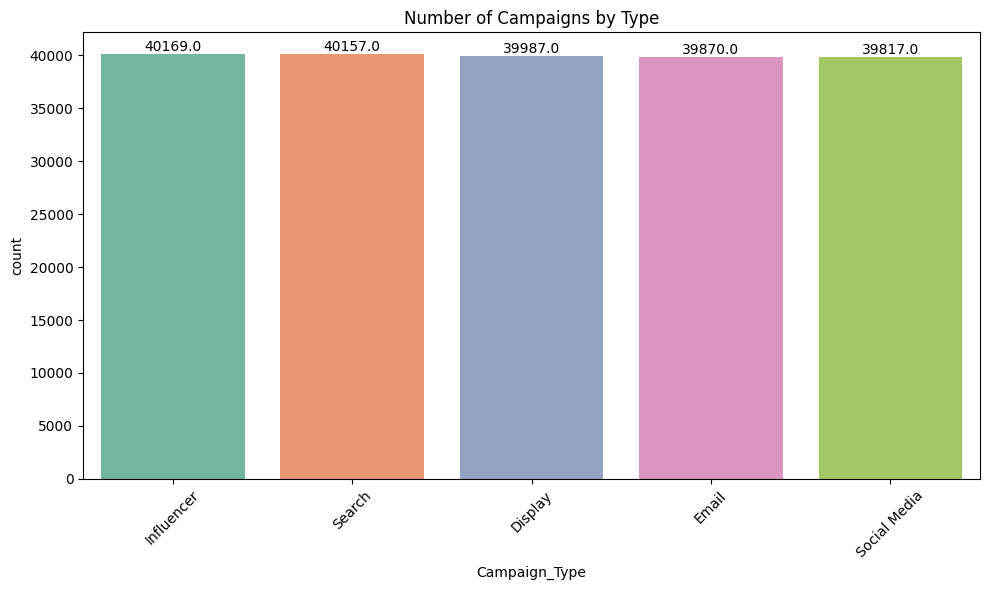

In [11]:
# -- Distribution of campaign types. --
plt.figure(figsize=(10, 6))

order = df['Campaign_Type'].value_counts().index # orders campaign types from most to least

# Define the palette
campaign_types = df['Campaign_Type'].value_counts().index  # Get campaign types in descending order
palette = dict(zip(campaign_types, sns.color_palette('Set2', n_colors=len(campaign_types))))  # Set2 is one of Seaborn's palettes

ax = sns.countplot(x='Campaign_Type', order=order, data=df, hue='Campaign_Type', palette=palette, legend=False)
plt.title("Number of Campaigns by Type")
plt.xticks(rotation=45)

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)

# Display the plot on the screen
plt.tight_layout()
plt.show()


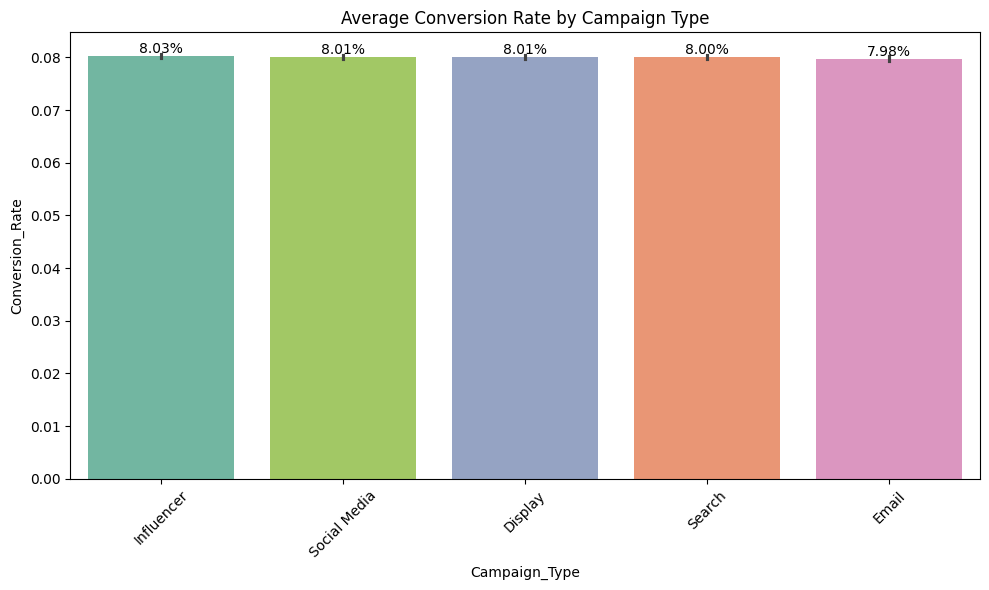

In [13]:
# -- Conversion Rate by Channel --

# # Define the palette for each Campaign_Type
# campaign_types = df['Campaign_Type'].value_counts().index
# palette = dict(zip(campaign_types, sns.color_palette('Set2', n_colors=len(campaign_types))))

# Get average conversion rate per campaign type
order = df.groupby('Campaign_Type')['Conversion_Rate'].mean().sort_values(ascending=False).index

# Plot with consistent palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Campaign_Type', y='Conversion_Rate', hue='Campaign_Type', data=df, order=order, palette=palette, legend=False)
plt.title("Average Conversion Rate by Campaign Type")
plt.xticks(rotation=45)

# Add value labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2%}',  # Format as percentage
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)


# Display the plot on the screen
plt.tight_layout()
plt.show()

In [14]:
print(df['ROI'].describe())
print(df['ROI'].head())
print(df.groupby('Campaign_Type')['ROI'].describe())

count    200000.000000
mean          5.002438
std           1.734488
min           2.000000
25%           3.500000
50%           5.010000
75%           6.510000
max           8.000000
Name: ROI, dtype: float64
0    6.29
1    5.61
2    7.18
3    5.55
4    6.50
Name: ROI, dtype: float64
                 count      mean       std  min   25%   50%   75%  max
Campaign_Type                                                         
Display        39987.0  5.006551  1.730120  2.0  3.50  5.02  6.49  8.0
Email          39870.0  4.994295  1.732846  2.0  3.50  5.00  6.49  8.0
Influencer     40169.0  5.011068  1.735821  2.0  3.50  5.02  6.52  8.0
Search         40157.0  5.008357  1.739808  2.0  3.50  5.00  6.53  8.0
Social Media   39817.0  4.991784  1.733794  2.0  3.48  4.99  6.49  8.0
